# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [35]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

from sklearn import metrics
# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
# Mounting Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/AIML UNIVERSITY OF TEXAS MODULES/Computer Vision/Transfer Learning/Hands On/Project 8 Computer vision - Plant Seedling Classifications/images (1).npy')

In [9]:
# Load the labels file of dataset
labels = pd.read_csv('/Labels (1).csv')

## Data Overview

### Understanding the shape of the dataset

In [10]:
# checking the shape of the images
print(images.shape)

(4750, 128, 128, 3)


In [11]:
# checking the shape of the labels
print(labels.shape)

(4750, 1)


* There are 4750 RGB Images of shape 128 x 128 * 3 each. Each image is having 3 channels
* there are 4750 label

## Exploratory Data Analysis

### Plotting random images from each of the class

In [12]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

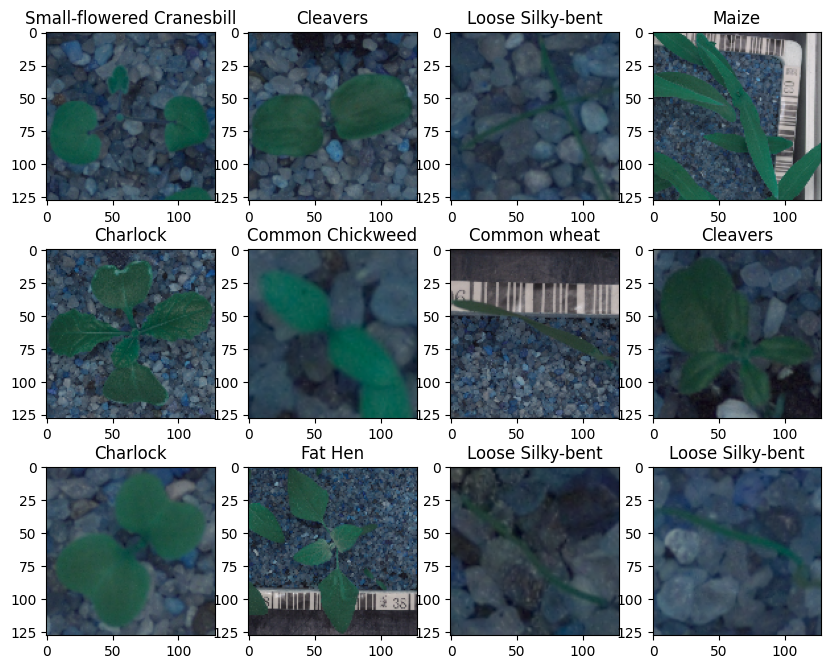

In [13]:
# plotting images with thier labels
plot_images(images,labels)

* All images have been displayed with their labels

### Checking the distribution of the target variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

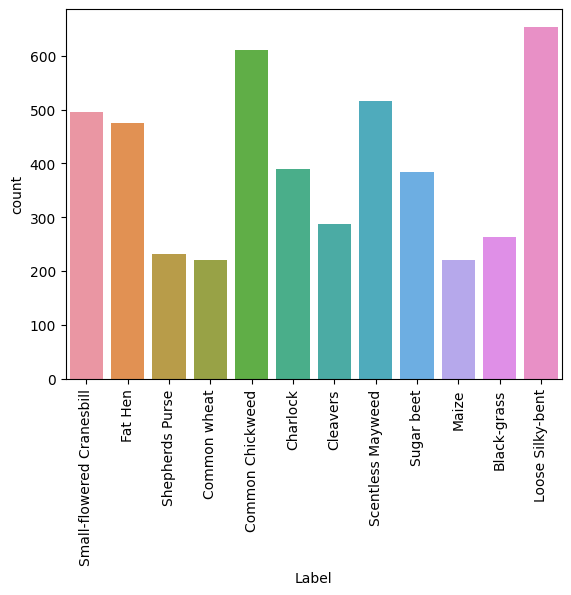

In [14]:
# checking for imbalance data in the dataset
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

* From the plot above, we can observe that the dataset is imbalance with not equal volume of data
* Shepherds purse and common wheat seem to have not enough data
* there is need to use data augmentation to balance the dataset since it is a classification challenge

## Data Pre-Processing

### Converting the BGR images to RGB images.

In [15]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

* The color has been converted from BGR of Open CV to RGB of PIL/Matplotlib

### Resizing images

In [16]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

* For computational cost purpose, the image size has been resized from 128 to 64

**Image before resizing**

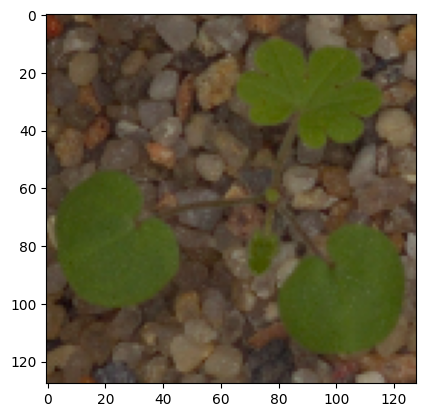

In [17]:
# Displaying the image before it resize
plt.imshow(images[8])

* Image size is 120 by 120

**Image after resizing**

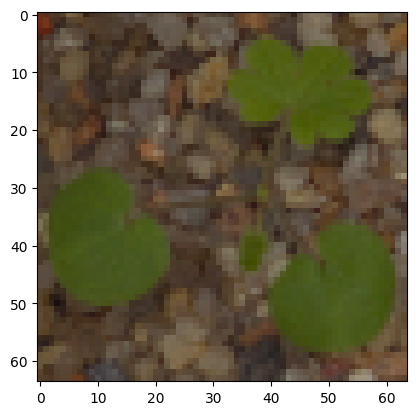

In [18]:
# Displaying image after resizing
plt.imshow(images_decreased[8])

* Image new size has been reduced from 120 by 120 to 60 by 60
* Image after resizing looks blurring

### Data Preparation for Modeling


In [19]:
# Spliiting of the dataset into testing, validation and training data
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels , test_size= 0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

* since we do not have enough data/images in the dataset, we would split the dataset between testing, validation and training data in 10%, 10% and 80% respectively.

In [20]:
# checking the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


* Train data has 3847 images, 64 x 64 pixels of 3 channels RGB
* Validation data has 428 images, 64 x 64 pixels of 3 channels RGB
* Test data has 475 images, 64 x 64 pixels of 3 channels RGB

### Encoding the target labels

In [21]:
# Using LabelBinarizer for the dataset
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [22]:
# checking the shape of train, validation and test data on the dataset
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

* Training data is 3847
* Validation data 428
* Testing data 475

### Data Normalization

In [23]:
# Normalizing the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

* this is standardizing the the images to have values between 0 - 1

## Model Building

In [24]:
# Clearing backend
backend.clear_session()

In [25]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [26]:
# Intializing a sequential model
model1 = Sequential()

# Adding the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D( 128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Creating two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using the Adam Optimizer
opt=Adam()

# Compiling the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data

In [27]:
# Fitting the model on train and also using the validation data for validation
history_1 = model1.fit(
          X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 8s - loss: 2.4543 - accuracy: 0.1048 - val_loss: 2.4350 - val_accuracy: 0.1379 - 8s/epoch - 63ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3374 - accuracy: 0.1926 - val_loss: 2.1729 - val_accuracy: 0.3271 - 1s/epoch - 9ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0120 - accuracy: 0.3265 - val_loss: 1.7756 - val_accuracy: 0.4065 - 1s/epoch - 10ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8256 - accuracy: 0.3754 - val_loss: 1.6354 - val_accuracy: 0.4556 - 1s/epoch - 10ms/step
Epoch 5/30
121/121 - 1s - loss: 1.6881 - accuracy: 0.4169 - val_loss: 1.4238 - val_accuracy: 0.5350 - 1s/epoch - 11ms/step
Epoch 6/30
121/121 - 1s - loss: 1.5472 - accuracy: 0.4611 - val_loss: 1.3578 - val_accuracy: 0.5748 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 1.4756 - accuracy: 0.4744 - val_loss: 1.2482 - val_accuracy: 0.5678 - 1s/epoch - 9ms/step
Epoch 8/30
121/121 - 1s - loss: 1.4006 - accuracy: 0.5012 - val_loss: 1.1507 - val_accuracy: 0.6262 - 1s/epoch - 9ms/step
Epoch 9/30
121/121 -

* From the plotting above, the losses from both training and validation are not close, 80% and 87%
* Likewise accuracy for both training and validation dataset are not within the same range 70% and 74% respectively
* These show that this model is not generalizing well enough and it is overfitting

**Model Evaluation**

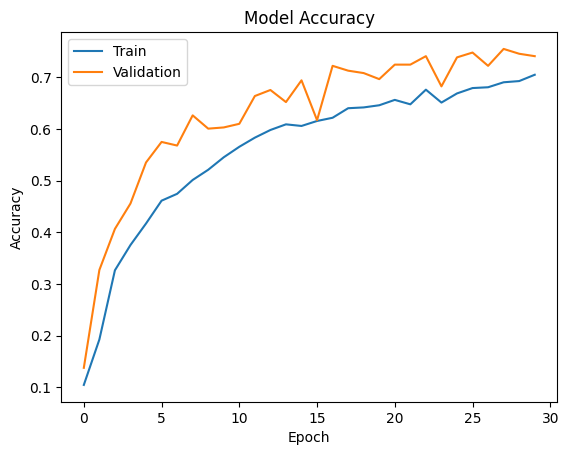

In [28]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* From the plot above i observed that the training accuracy of the model is around 66% and the validation accuracy of the model is fluctuating around 75%
* this shows that the model is not stable and not generalizing well.

**Evaluate the model on test data**

In [29]:
 # Evaluating the model on test data
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8674 - accuracy: 0.7137 - 362ms/epoch - 24ms/step


* From the plot above on the test data, the loss is 86 and training is 80. therefore the loss on the test dataset is higher than that of the training dataset.
* the accuracy is 71% on test dataset , training accuracy is 70% and validation is 74%.


**Plotting the Confusion Matrix**



In [30]:
# Getting the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step


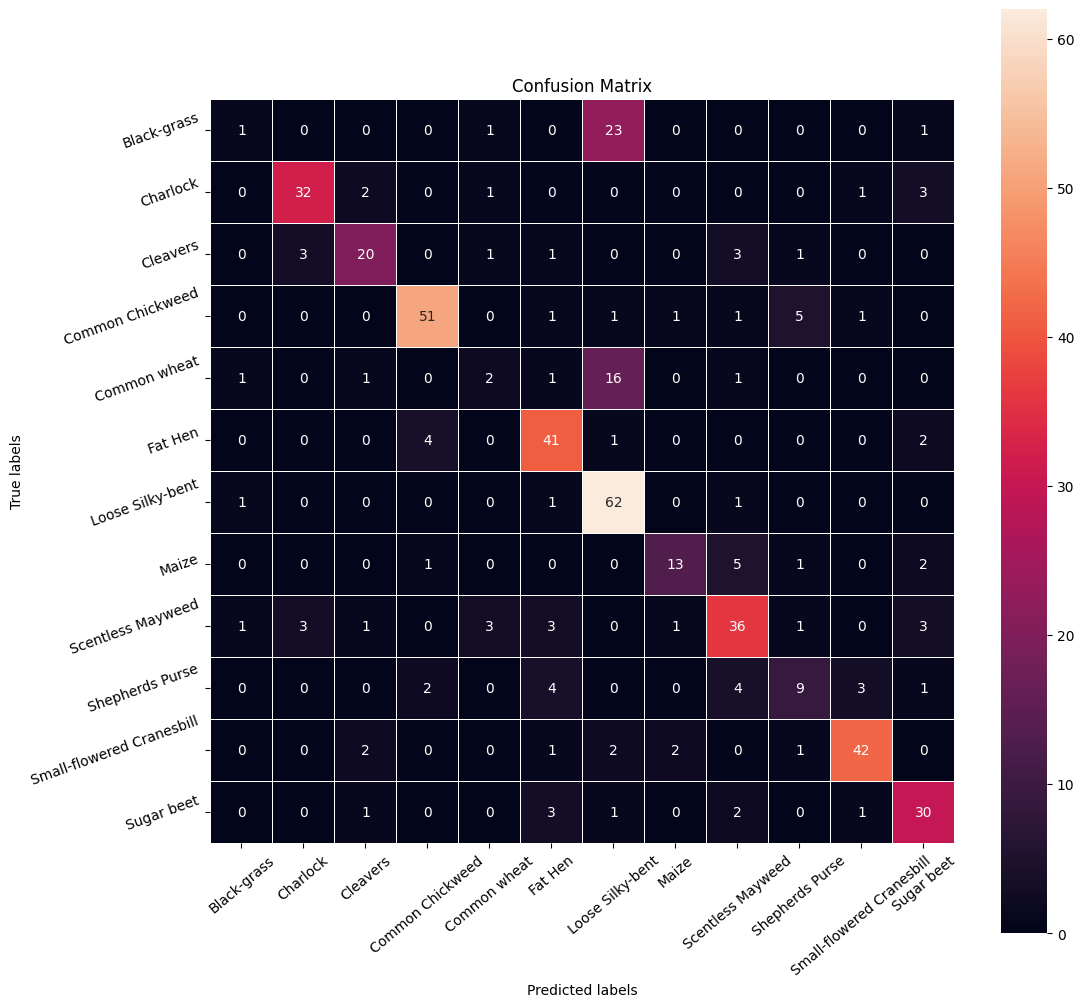

In [37]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

* From the pllt above, i obsevred that some of the plants are not well predicted.
* When compared with other classes, i observed that some of the classes like Black-grass and Common wheat were not well classified

**Plotting Classification Report**

In [39]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.25      0.04      0.07        26
           1       0.84      0.82      0.83        39
           2       0.74      0.69      0.71        29
           3       0.88      0.84      0.86        61
           4       0.25      0.09      0.13        22
           5       0.73      0.85      0.79        48
           6       0.58      0.95      0.73        65
           7       0.76      0.59      0.67        22
           8       0.68      0.69      0.69        52
           9       0.50      0.39      0.44        23
          10       0.88      0.84      0.86        50
          11       0.71      0.79      0.75        38

    accuracy                           0.71       475
   macro avg       0.65      0.63      0.63       475
weighted avg       0.69      0.71      0.69       475



## Model Performance Improvement

In [40]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

In [41]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [42]:
# Setting the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [43]:
# Intializing a sequential model
model2 = Sequential()

# Adding the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Adam Optimimzer
opt=Adam()
# Compiling the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

<b> Fitting the model on the train data

In [44]:
# Complete the code to fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 9s 85ms/step - loss: 2.1411 - accuracy: 0.2440 - val_loss: 2.4104 - val_accuracy: 0.1963 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 7s 111ms/step - loss: 1.6752 - accuracy: 0.4203 - val_loss: 2.2745 - val_accuracy: 0.2313 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 4s 73ms/step - loss: 1.4741 - accuracy: 0.4861 - val_loss: 2.2240 - val_accuracy: 0.3551 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 4s 73ms/step - loss: 1.4068 - accuracy: 0.5181 - val_loss: 2.1626 - val_accuracy: 0.3949 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 7s 112ms/step - loss: 1.2772 - accuracy: 0.5535 - val_loss: 1.8733 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 8s 126ms/step - loss: 1.1835 - accuracy: 0.5808 - val_loss: 1.7249 - val_accuracy: 0.5701 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 7s 113ms/step - loss:

* from the plot above the loss for the training is 0.67 and for validation is 0.70 , with very small difference
* the accuracy for training is 75% and validation accuracy is 79%
* Unlike the first model1, this model2 the losses have reduced both on training and validation
* Unlike the previous model1, this model2 the accuracy has increased.

**Model Evaluation**

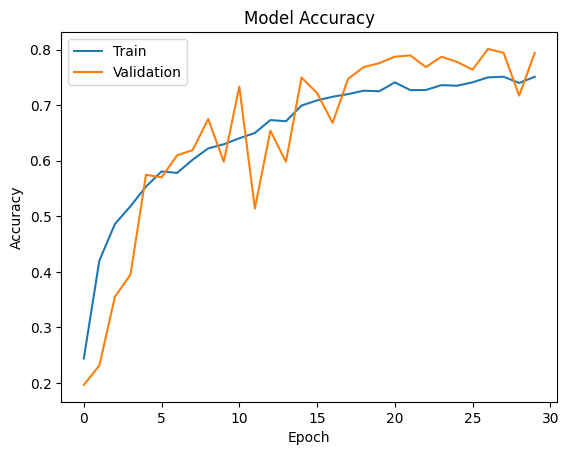

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* From the plot above, accuracy for training is around 75% and accuracy for validation is around 79%
* i observed that the model has some noise in the validation dataset and imbalance

**Evaluate the model on test data**

In [46]:
 # Evaluating the model on test data
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.7769 - accuracy: 0.7474 - 229ms/epoch - 15ms/step


* After evaluating the training data on the test data, loss is 0.77 and accuracy is ~75% unlike model1 with loss: 0.8674 - accuracy: 71%
* it is safe to say that model2 is generalizing better

**Plotting the Confusion Matrix**

In [47]:
# Obtaining the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


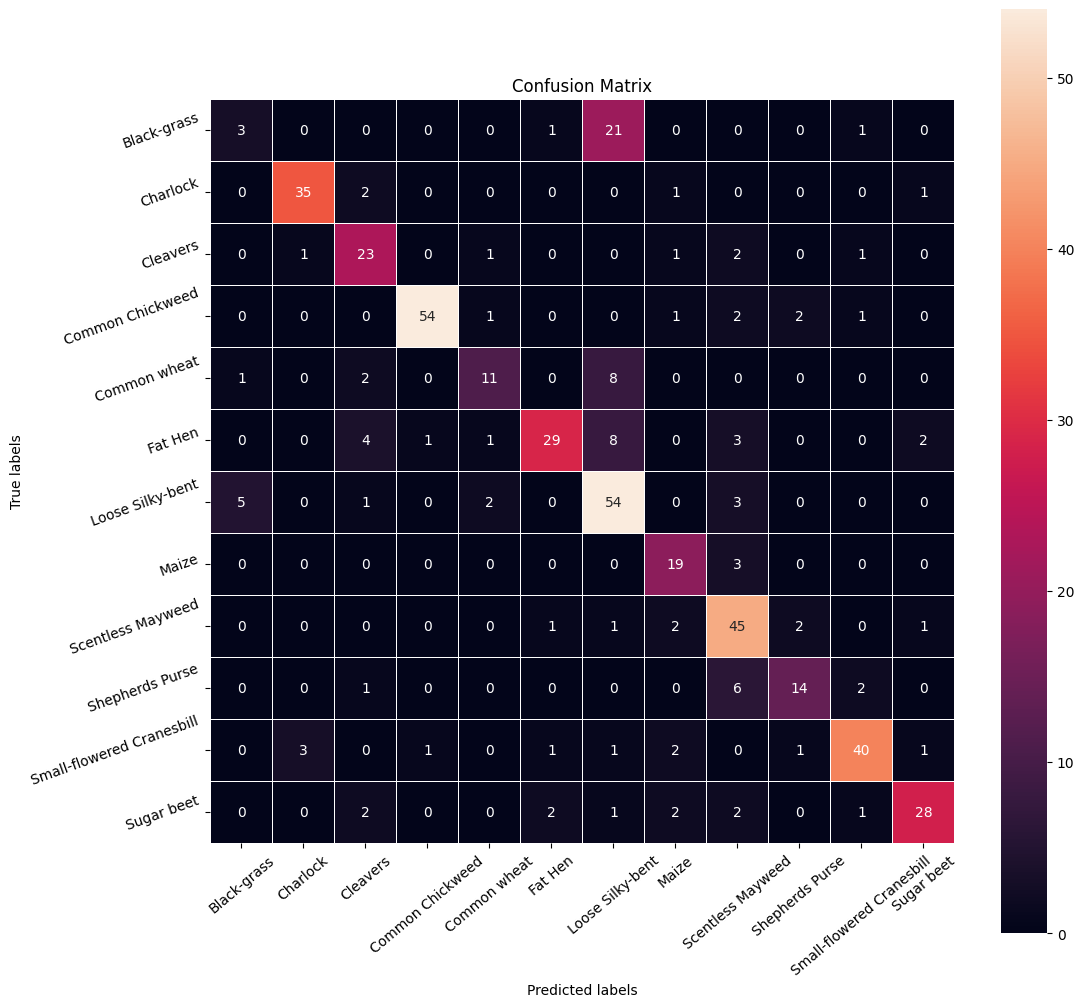

In [48]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

* From the above plot, it was observed there has been some improvement but yet some confusion still on Black-grass and Common wheat
* Black-grass and Common wheat are still most confused classes
* But the this model has improved in performance compare to model1 the previous model
* Therefore this model2 seems to be generalizing much more than model1

**Plotting Classification Report**

In [49]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.12      0.17        26
           1       0.90      0.90      0.90        39
           2       0.66      0.79      0.72        29
           3       0.96      0.89      0.92        61
           4       0.69      0.50      0.58        22
           5       0.85      0.60      0.71        48
           6       0.57      0.83      0.68        65
           7       0.68      0.86      0.76        22
           8       0.68      0.87      0.76        52
           9       0.74      0.61      0.67        23
          10       0.87      0.80      0.83        50
          11       0.85      0.74      0.79        38

    accuracy                           0.75       475
   macro avg       0.73      0.71      0.71       475
weighted avg       0.75      0.75      0.74       475



## Final Model

### Visualizing the prediction

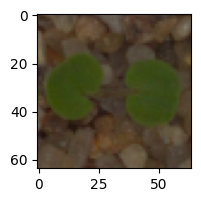

1/1 [==============================] - 0s 255ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


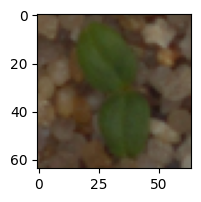

1/1 [==============================] - 0s 73ms/step
Predicted Label ['Cleavers']
True Label Cleavers


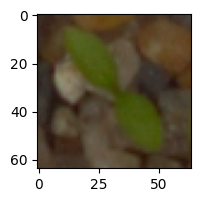

1/1 [==============================] - 0s 79ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


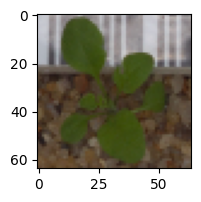

1/1 [==============================] - 0s 46ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [50]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Predicting the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Predicting the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Predicting the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Predicting the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

* I observe that the from  the images displayed above, all images have been predicted correctly and the labels too are correctly labelled
* showing that by Augmenting the dataset , it actually helped to improve the model performance.

## Actionable Insights and Business Recommendations

* I observed that model2 outperformed better than model1 with loss: 0.7769 - accuracy: 75%
* Model2 was able to do better predictions of the classes of the plants better than model1
* After Augmenting the dataset in model2, the performance improved. showing that data augmentation was a very good tool for this model performance
* This model2 seems to be generalizing better than model1
* Maybe with more data given, it could help the model to do better prediction on Black-grass seedling to prevent misclassfication.